In [1]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
#from mpl_toolkits.basemap import Basemap
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('ACdb/MASTER.txt', low_memory=False)
print('Dataframe dimensions:', df.shape)
#____________________________________________________________
# gives some infos on columns types and number of null values
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
tab_info

Dataframe dimensions: (287498, 35)


,N-NUMBER,SERIAL NUMBER,MFR MDL CODE,ENG MFR MDL,YEAR MFR,TYPE REGISTRANT,NAME,STREET,STREET2,CITY,STATE,ZIP CODE,REGION,COUNTY,COUNTRY,LAST ACTION DATE,CERT ISSUE DATE,CERTIFICATION,TYPE AIRCRAFT,TYPE ENGINE,STATUS CODE,MODE S CODE,FRACT OWNER,AIR WORTH DATE,OTHER NAMES(1),OTHER NAMES(2),OTHER NAMES(3),OTHER NAMES(4),OTHER NAMES(5),EXPIRATION DATE,UNIQUE ID,KIT MFR,KIT MODEL,MODE S CODE HEX,Unnamed: 34
column type,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,int64,object,object,object,int64,object,int64,object,object,object,object,object,object,object,object,int64,object,object,object,float64
null values (nb),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,287498
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0


In [3]:
df_ACFTREF = pd.read_csv('ACdb/ACFTREF.txt', low_memory=False)
print('Dataframe dimensions:', df_ACFTREF.shape)

Dataframe dimensions: (88925, 14)


In [4]:
df.head()

,N-NUMBER,SERIAL NUMBER,MFR MDL CODE,ENG MFR MDL,YEAR MFR,TYPE REGISTRANT,NAME,STREET,STREET2,CITY,STATE,ZIP CODE,REGION,COUNTY,COUNTRY,LAST ACTION DATE,CERT ISSUE DATE,CERTIFICATION,TYPE AIRCRAFT,TYPE ENGINE,STATUS CODE,MODE S CODE,FRACT OWNER,AIR WORTH DATE,OTHER NAMES(1),OTHER NAMES(2),OTHER NAMES(3),OTHER NAMES(4),OTHER NAMES(5),EXPIRATION DATE,UNIQUE ID,KIT MFR,KIT MODEL,MODE S CODE HEX,Unnamed: 34
0,1,680-0519,2076811,52041,2014,7,TENAX AEROSPACE LLC ...,124 ONE MADISON PLZ STE 2100,,MADISON,MS,391102021,2,089,US,20211201,20211130,1T,5,5,V,50000001,,20140325,...,...,...,...,...,20241130,1141371,,,A00001,NaN
1,100,5334,7100510,17003,1940,1,BENE MARY D ...,PO BOX 329,,KETCHUM,OK,743490329,2,097,US,20200105,20050506,1,4,1,V,50002263,,19540430,...,...,...,...,...,20230430,600060,,,A004B3,NaN
2,10001,A28,9601202,67007,1928,1,STOOS ROBERT A ...,PO BOX 1056,,LAKELAND,FL,338021056,7,105,US,20190227,20190227,1,4,1,25,50003446,,,...,...,...,...,...,20220228,432072,,,A00726,NaN
3,10004,T18208245,2072738,,,7,ETOS AIR LLC ...,PO BOX 288,,NEW LONDON,TX,756820288,2,401,US,20211014,20130312,,4,1,V,50003451,,,...,...,...,...,...,20250331,102879,,,A00729,NaN
4,10006,BG-72,1152020,17026,1955,1,COUTCHES ROBERT HERCULES DBA ...,550 AIRWAY BLVD,,LIVERMORE,CA,945519533,4,001,US,20201125,19980826,1U,4,1,V,50003453,,19710909,AERO FLIGHT AVIATION ...,...,...,...,...,20240229,480110,,,A0072B,NaN


In [5]:
df_ACFTREF.head(1)

,CODE,MFR,MODEL,TYPE-ACFT,TYPE-ENG,AC-CAT,BUILD-CERT-IND,NO-ENG,NO-SEATS,AC-WEIGHT,SPEED,TC-DATA-SHEET,TC-DATA-HOLDER,Unnamed: 13
0,0020901,AAR AIRLIFT GROUP INC,UH-60A,6,3,1,0,2,15,CLASS 3,0,,...,NaN


In [6]:
train_set = pd.read_csv('Data/merged_flights.csv', index_col=0)
train_set.head(1)

,SCHEDULED_DATE,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DEPARTURE_DELAY,SPEED,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,Count Flights,Enplanements,area
0,2015-01-01,4,AS,N407AS,ANC,SEA,00:05:00,23:54:00,21.0,00:15:00,205.0,1448,04:30:00,-22.0,-11.0,423.805,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,7888,"2,713,843",west


In [7]:
ACs = list(set(train_set['TAIL_NUMBER']))

In [8]:
len(ACs)

4688

In [9]:
all_ACs = list(df['N-NUMBER'])

missing_ACs = [AC[1:] for AC in ACs if AC[1:] not in all_ACs]
len(missing_ACs)

1322

In [10]:
df.head(1)

,N-NUMBER,SERIAL NUMBER,MFR MDL CODE,ENG MFR MDL,YEAR MFR,TYPE REGISTRANT,NAME,STREET,STREET2,CITY,STATE,ZIP CODE,REGION,COUNTY,COUNTRY,LAST ACTION DATE,CERT ISSUE DATE,CERTIFICATION,TYPE AIRCRAFT,TYPE ENGINE,STATUS CODE,MODE S CODE,FRACT OWNER,AIR WORTH DATE,OTHER NAMES(1),OTHER NAMES(2),OTHER NAMES(3),OTHER NAMES(4),OTHER NAMES(5),EXPIRATION DATE,UNIQUE ID,KIT MFR,KIT MODEL,MODE S CODE HEX,Unnamed: 34
0,1,680-0519,2076811,52041,2014,7,TENAX AEROSPACE LLC ...,124 ONE MADISON PLZ STE 2100,,MADISON,MS,391102021,2,089,US,20211201,20211130,1T,5,5,V,50000001,,20140325,...,...,...,...,...,20241130,1141371,,,A00001,NaN


Useful columns: 

* YEAR MFR : Year manufactured
* TYPE REGISTRANT:
* TYPE AIRCRAFT
* TYPE ENGINE

<div>
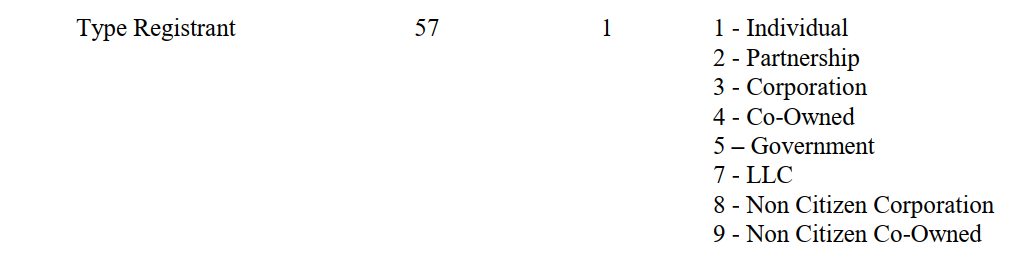
</div>

<div>
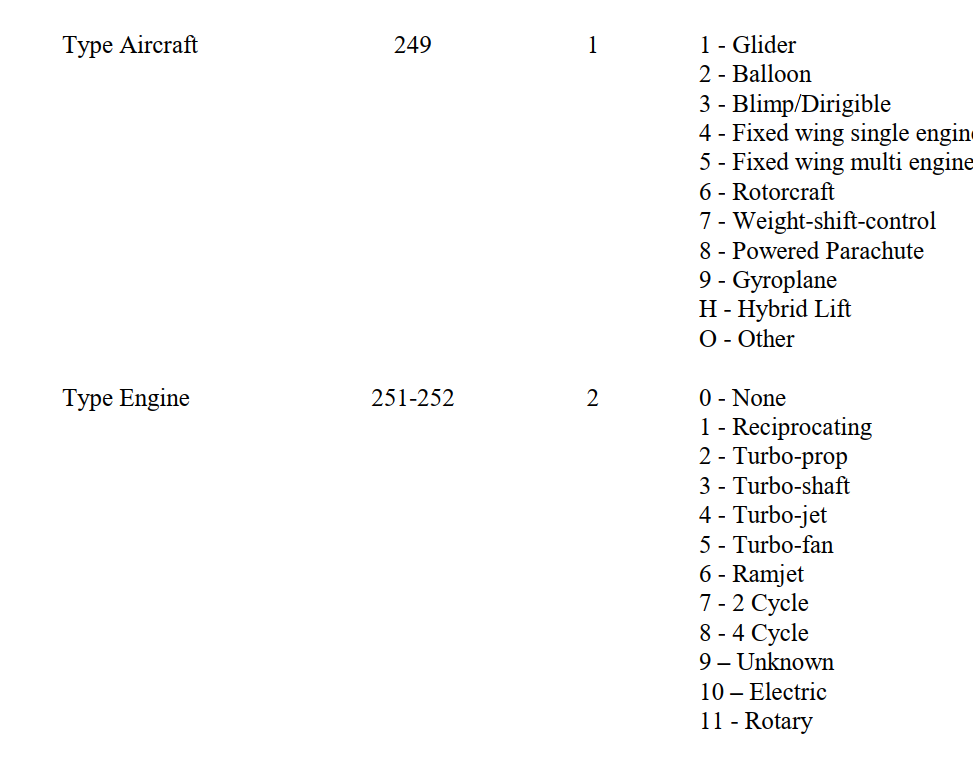
</div>

In [11]:
# We keep only the columns we are interested in:
df_ACs = df[['N-NUMBER', 'YEAR MFR', 'TYPE REGISTRANT', 'TYPE AIRCRAFT', 'TYPE ENGINE']]

In [12]:
display(train_set.head(1))
display(df_ACs.head(1))

,SCHEDULED_DATE,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DEPARTURE_DELAY,SPEED,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,Count Flights,Enplanements,area
0,2015-01-01,4,AS,N407AS,ANC,SEA,00:05:00,23:54:00,21.0,00:15:00,205.0,1448,04:30:00,-22.0,-11.0,423.805,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,7888,"2,713,843",west


,N-NUMBER,YEAR MFR,TYPE REGISTRANT,TYPE AIRCRAFT,TYPE ENGINE
0,1,2014,7,5,5


In [13]:
#Make the tail numbers start with N-
df_ACs['N-NUMBER'] = df_ACs['N-NUMBER'].apply(lambda x: 'N'+str(x))

train_set_merged = pd.merge(train_set, df_ACs, left_on='TAIL_NUMBER', right_on='N-NUMBER', how='left')
train_set_merged.head(5)

,SCHEDULED_DATE,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DEPARTURE_DELAY,SPEED,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,Count Flights,Enplanements,area,N-NUMBER,YEAR MFR,TYPE REGISTRANT,TYPE AIRCRAFT,TYPE ENGINE
0,2015-01-01,4,AS,N407AS,ANC,SEA,00:05:00,23:54:00,21.0,00:15:00,205.0,1448,04:30:00,-22.0,-11.0,423.805,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,7888,"2,713,843",west,N407AS,2012,3,5,5.0
1,2015-01-01,4,AS,N309AS,ANC,SEA,00:45:00,00:41:00,17.0,00:58:00,204.0,1448,05:09:00,-14.0,-4.0,425.882,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,7888,"2,713,843",west,N309AS,2001,3,5,5.0
2,2015-01-01,4,DL,N3743H,ANC,SEA,00:45:00,00:31:00,25.0,00:56:00,210.0,1448,05:15:00,-24.0,-14.0,413.714,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,7888,"2,713,843",west,N3743H,2001,3,5,5.0
3,2015-01-01,4,AS,N413AS,ANC,PDX,00:50:00,00:46:00,11.0,00:57:00,215.0,1542,05:25:00,-18.0,-4.0,430.326,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,7888,"2,713,843",west,N413AS,2013,3,5,5.0
4,2015-01-01,4,US,N804AW,ANC,PHX,01:52:00,01:43:00,21.0,02:04:00,323.0,2552,09:15:00,-10.0,-9.0,474.056,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,7888,"2,713,843",west,N804AW,1999,3,5,4.0


Text(0.5, 1.0, 'Year manufacturer vs Mean delay')

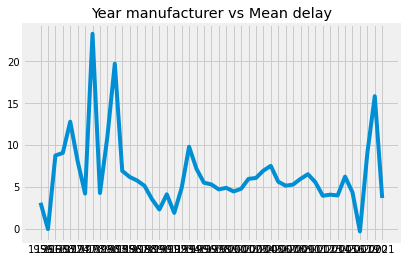

In [20]:
data = train_set_merged.groupby('YEAR MFR')['ARRIVAL_DELAY'].mean()
# ind = [str(s) for s in list(data.index)]
# plt.bar(ind, data)
plt.plot(data[2:])
plt.title('Year manufacturer vs Mean delay')

In [37]:
train_set_merged = train_set_merged.fillna(0)
print('AC types: ', set(train_set_merged['TYPE AIRCRAFT']))
print('Engine types: ', set(train_set_merged['TYPE ENGINE']))
print('Registrant types: ', set(train_set_merged['TYPE REGISTRANT']))
print('Range year manufactured: 1959 - 2021')

AC types:  {0, '4', '6', '5'}
Engine types:  {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 8.0}
Registrant types:  {0, '8', '3', '2', '1', '7', '4'}
Range year manufactured: 1959 - 2021


0

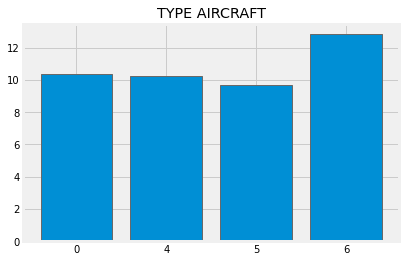

In [61]:
data = train_set_merged.groupby('TYPE AIRCRAFT')['DEPARTURE_DELAY'].mean()
ind = [str(s) for s in list(data.index)]
plt.bar(ind, data)
plt.title('TYPE AIRCRAFT')
len(train_set_merged[train_set_merged['TYPE REGISTRANT'] == 6])

Text(0.5, 1.0, 'TYPE REGISTRANT')

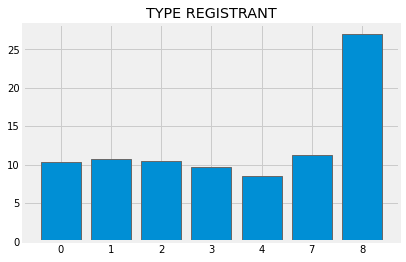

In [50]:
data = train_set_merged.groupby('TYPE REGISTRANT')['DEPARTURE_DELAY'].mean()
ind = [str(s) for s in list(data.index)]
plt.bar(ind, data)
plt.title('TYPE REGISTRANT')

In [57]:
display(len(train_set_merged))
len(train_set_merged[train_set_merged['TYPE REGISTRANT'] == '8'])

2818553

57

Text(0.5, 1.0, 'TYPE ENGINE')

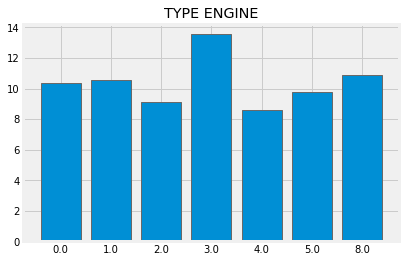

In [49]:
data = train_set_merged.groupby('TYPE ENGINE')['DEPARTURE_DELAY'].mean()
ind = [str(s) for s in list(data.index)]
plt.bar(ind, data)
plt.title('TYPE ENGINE')

In [59]:
display(len(train_set_merged))
len(train_set_merged[train_set_merged['TYPE ENGINE'] == 3])

2818553

955

## Year Manufacturing

In [43]:

train_set_merged['YEAR MFR'] = train_set_merged['YEAR MFR'].replace(np.nan, 0)
train_set_merged['YEAR MFR'] = train_set_merged['YEAR MFR'].replace('    ', 0)

# list_ = [int(i) for i in train_set_merged['YEAR MFR']]
train_set_merged["YEAR MFR"] = pd.to_numeric(train_set_merged["YEAR MFR"])

<AxesSubplot:xlabel='YEAR MFR', ylabel='ARRIVAL_DELAY'>

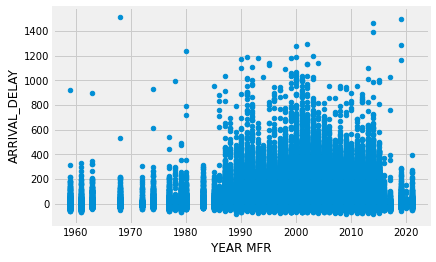

In [46]:
gg = train_set_merged[train_set_merged['YEAR MFR'] != 0]

gg.plot.scatter(
    x="YEAR MFR", 
    y="ARRIVAL_DELAY"
)